## Import libraries

In [3]:
from urllib.parse import urlparse

from arcgis.gis import GIS, Item
from arcgis.features import FeatureLayerCollection
from arcgis.mapping import WebMap

## Connect to _source_ and _target_ organizations

In [4]:
source = GIS(profile="your_profile_1", verify_cert=False)
target = GIS(profile="your_profile_2", verify_cert=False)

## Clone Webmap

### Get a Webmap item from _source_

<Item title:"Riverside County, CA Wind Turbine Locations" type:Web Map owner:your_username>
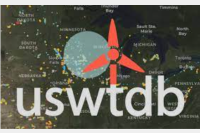

In [5]:
turbine_wm_item = source.content.get("c29711c91d894be0b7f9838a2ecba7c5")
turbine_wm_item

### Initialize `WebMap` object to inspect layers

In [6]:
turbine_wm = WebMap(turbine_wm_item)
turbine_wm

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

### Print information about `Webmap` layers

In [7]:
turbine_layers = [lyr["title"] for lyr in turbine_wm.layers]
turbine_layers

['Boundaries Layer',
 'Land Acquisition Target Areas',
 'Riverside County Wind Turbines']

In [8]:
for wm_lyr in turbine_wm.layers:
    print(f"{wm_lyr['title']:40}{wm_lyr['layerType']:22}\n{' '*10}{list(wm_lyr.keys())}")
    print("\n")

Boundaries Layer                        GroupLayer            
          ['id', 'title', 'layers', 'layerType']


Land Acquisition Target Areas           ArcGISFeatureLayer    
          ['layerType', 'id', 'title', 'featureCollection', 'visibility', 'opacity']


Riverside County Wind Turbines          ArcGISFeatureLayer    
          ['id', 'title', 'url', 'itemId', 'layerType', 'featureEffect', 'layerDefinition', 'popupInfo']




### Define function to print whether Web Map layers are hosted

In [9]:
active_gis = source

In [10]:
def is_hosted(webmap_lyr):
    if not hasattr(webmap_lyr, "url"):
        raise Exception("Layer must have a url attribute to be check hosting status.")
    parsed_url = urlparse(webmap_lyr['url'])
    if parsed_url.path.split(r'/')[1] == active_gis.users.me.orgId:
        return "hosted"
    else:
        return "non-hosted"

### Inspect structure of Web Map

In [11]:
for wm_lyr in turbine_wm.layers:
    if hasattr(wm_lyr, "layers"):
        print(f"{wm_lyr['title']:40}{wm_lyr['layerType']:22}")
        for sub_lyr in wm_lyr.layers:
            hosting_status = is_hosted(sub_lyr)
            print(f"{' '*2}{sub_lyr['title']:40}{sub_lyr['layerType']:24}")
            if hasattr(sub_lyr, "url"):
                print(f"{' '*4}{sub_lyr['url']}{' '*2}{hosting_status}")
        print("\n")
    else:
        print(f"{wm_lyr['title']:40}{wm_lyr['layerType']:22}")
        if hasattr(wm_lyr, "url"):
            hosting_status = is_hosted(wm_lyr)
            print(f"{' '*4}{wm_lyr['url']}{' '*2}{hosting_status}")
        elif hasattr(wm_lyr, "featureCollection"):
            print(f"{' '*4}Feature Collection")
        print("\n")

Boundaries Layer                        GroupLayer            
  Coachella Valley Cities                 ArcGISFeatureLayer      
    https://services1.arcgis.com/ZIL9uO234SBBPGL7/arcgis/rest/services/CityUnincorporated_boundary/FeatureServer/0  non-hosted
  Riverside County Boundary               ArcGISFeatureLayer      
    https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Counties/FeatureServer/0  non-hosted


Land Acquisition Target Areas           ArcGISFeatureLayer    
    Feature Collection


Riverside County Wind Turbines          ArcGISFeatureLayer    
    https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/ac2175/FeatureServer/0  hosted




### Clone the Web Map

In [12]:
clone_results = target.content.clone_items(items=[turbine_wm_item],
                                     folder="uswtb_data")
clone_results

[<Item title:"California_Utility-Scale_Wind_Turbines" type:Feature Layer Collection owner:your_username>,
 <Item title:"Riverside County, CA Wind Turbine Locations" type:Web Map owner:your_username>]

In [13]:
active_gis = target

### Inspect structure of cloned Web Map

In [14]:
for lyr in WebMap(clone_results[1]).layers:
    if hasattr(lyr, "layers"):
        print(f"{lyr['title']:45}{lyr['layerType']}\n{'-'*40}{' '*5}{'-'*35}")
        for sub_lyr in lyr.layers:
            hosting_status = is_hosted(sub_lyr)
            print(f"{' '*2}{sub_lyr['title']:40}{sub_lyr['layerType']:24}")
            if hasattr(sub_lyr, "url"):
                print(f"{' '*4}{sub_lyr['url']}{' '*2}{hosting_status}")
        print("\n")
    else:
        print(f"{lyr['title']:40}{lyr['layerType']:22}")
        if hasattr(lyr, "url"):
            hosting_status = is_hosted(lyr)
            print(f"{' '*4}{lyr['url']}{' '*2}{hosting_status}")
        elif hasattr(lyr, "featureCollection"):
            print(f"{' '*4}Feature Collection")
        print("\n")

Boundaries Layer                             GroupLayer
----------------------------------------     -----------------------------------
  Coachella Valley Cities                 ArcGISFeatureLayer      
    https://services1.arcgis.com/ZIL9uO234SBBPGL7/arcgis/rest/services/CityUnincorporated_boundary/FeatureServer/0  non-hosted
  Riverside County Boundary               ArcGISFeatureLayer      
    https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Counties/FeatureServer/0  non-hosted


Land Acquisition Target Areas           ArcGISFeatureLayer    
    Feature Collection


Riverside County Wind Turbines          ArcGISFeatureLayer    
    https://services1.arcgis.com/your_org_id/arcgis/rest/services/ac2175/FeatureServer/0  hosted


